# Breaking a variable to levels


The scenario for this tutorial is that, you have a series of a variable, such as the population density of different cities. And, you need to classify them into different groups according to this variable, e.g. the very high, medium high, medium, medium low, very low population density, etc.

In some cases, you already have a GeoDataFrame/DataFrame, in other cases, you just have a list that contain the numbers. So, the following cover two major functions:

1. tm.leveling_vector, which take a dataframe and a column name for the classifying; and
2. bk.get_levels, which take a list.

The two functions takes a break_method for the breaking methods, such as quantile(default), head_tail_break, natural_break, equal_interval (and manual).

They take a break_N parameter, for specifying the number of groups.

And they also take a break_cuts. 

First, import things that is needed.

In [53]:
import geopandas as gpd # for reading and manupulating shapefile
import matplotlib.pyplot as plt # for making figure
import seaborn as sns # for making distplot

from colouringmap import theme_mapping as tm # a function named leveling_vector in tm will be used
from colouringmap import breaking_levels as bk # a function named get_levels in bk will be used

# magic line for matlotlib figure to be shown inline in jupyter cell
%matplotlib inline 

read a demo file, and take a look

In [3]:
grid_res = gpd.read_file('data/community_results.shp')
grid_res.head()

,com,geometry,node,tweets,usercount,xcor,ycor
0,14,"POLYGON ((175239.9457184017 3947195.841823581,...",0,1,1,139.939807,35.640542
1,56,"POLYGON ((175239.9457767347 3947695.841815081,...",1,0,0,139.939919,35.645048
2,1,"POLYGON ((142239.9457464929 3956695.841823446,...",10,35,21,139.576848,35.731640
3,18,"POLYGON ((144239.9457266586 3959695.841818351,...",100,40,32,139.599535,35.758373
4,4,"POLYGON ((154239.9457194024 3947195.841822605,...",1000,1898,660,139.707733,35.644166


take a look at the data distribution. using seaborn distplot.

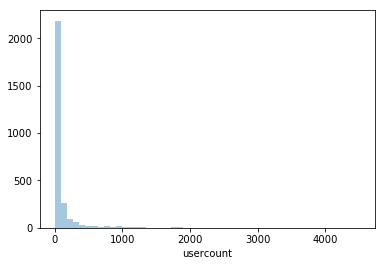

In [7]:
sns.distplot(grid_res['usercount'], kde=False)

the above plot showed that the data is potentially an exponential distribution.
so lets try to make the yscale log.

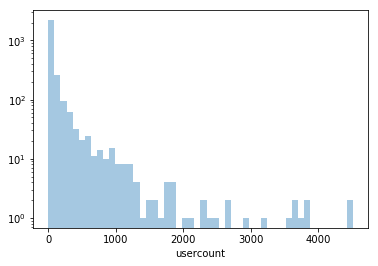

In [58]:
ax = sns.distplot(grid_res['usercount'], kde=False)
#ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


## using different break method:

1. quantile
2. head_tail_break
3. natural_break
4. equal_interval

the following is the most simple way of converting the column of a gdf to levels

In [29]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount') #, break_method='quantile') #default method is quantile

Normally, the level_list is used to be assign to the gdf. This is what I did in other functions of mapping.

In [18]:
grid_res['user_level'] = level_list

In [24]:
grid_res.head()

,com,geometry,node,tweets,usercount,xcor,ycor,user_level
0,14,"POLYGON ((175239.9457184017 3947195.841823581,...",0,1,1,139.939807,35.640542,0
1,56,"POLYGON ((175239.9457767347 3947695.841815081,...",1,0,0,139.939919,35.645048,0
2,1,"POLYGON ((142239.9457464929 3956695.841823446,...",10,35,21,139.576848,35.731640,2
3,18,"POLYGON ((144239.9457266586 3959695.841818351,...",100,40,32,139.599535,35.758373,2
4,4,"POLYGON ((154239.9457194024 3947195.841822605,...",1000,1898,660,139.707733,35.644166,4


cuts contain the breaking values, and the min/max at the both end of the list.

In [30]:
cuts

[0.0, 5.0, 14.0, 32.0, 103.0, 4506.0]

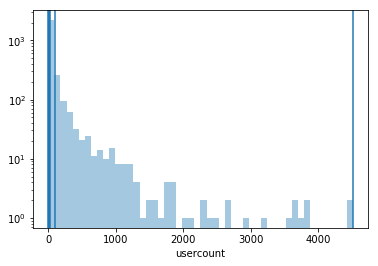

In [31]:
ax = sns.distplot(grid_res['usercount'], kde=False)
#ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
for c in cuts:
    ax.axvline(x=c)

In [32]:
lev = list(set(level_list))
count = [ level_list.count(l) for l in lev ]
print lev
print count

[0, 1, 2, 3, 4]
[568, 585, 531, 550, 554]


quantile has a similar count for each level.

Lets try some other break method.

In [33]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='head_tail_break')
print cuts

[0.0, 111.01004304160689, 483.8207547169811, 1173.1554054054054, 2146.409090909091, 4506.0]


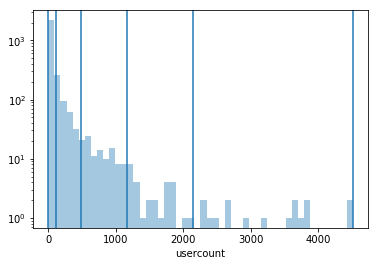

In [34]:
ax = sns.distplot(grid_res['usercount'], kde=False)
#ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
for c in cuts:
    ax.axvline(x=c)

In [35]:
lev = list(set(level_list))
count = [ level_list.count(l) for l in lev ]
print lev
print count

[0, 1, 2, 3, 4]
[2258, 382, 104, 28, 16]


In [36]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='natural_break')
print cuts

[0.0, 183.0, 644.0, 1465.0, 2677.0, 4506.0]


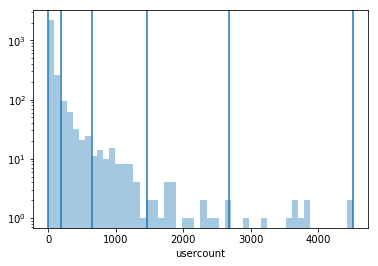

In [37]:
ax = sns.distplot(grid_res['usercount'], kde=False)
#ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
for c in cuts:
    ax.axvline(x=c)

In [38]:
lev = list(set(level_list))
count = [ level_list.count(l) for l in lev ]
print lev
print count

[0, 1, 2, 3, 4]
[2445, 236, 78, 19, 10]


In [39]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='equal_interval')
print cuts

[0.0, 901.2, 1802.4, 2703.6000000000004, 3604.8, 4506.0]


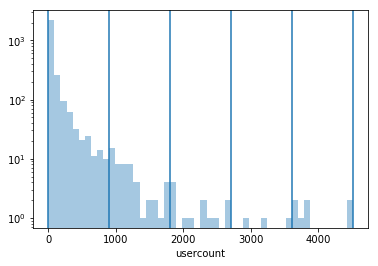

In [40]:
ax = sns.distplot(grid_res['usercount'], kde=False)
#ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
for c in cuts:
    ax.axvline(x=c)

In [41]:
lev = list(set(level_list))
count = [ level_list.count(l) for l in lev ]
print lev
print count

[0, 1, 2, 3, 4]
[2713, 53, 12, 3, 7]


## specifying the number of level

The number of level is set to the parameter break_N, which is default to 5.

After setting the break_N to N, the number of cuts become N+1, because it contain both the largest and the smallest values.

In [43]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='head_tail_break', break_N=3)
print cuts

[0.0, 111.01004304160689, 483.8207547169811, 4506.0]


In [44]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='head_tail_break', break_N=5)
print cuts

[0.0, 111.01004304160689, 483.8207547169811, 1173.1554054054054, 2146.409090909091, 4506.0]


In [45]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='head_tail_break', break_N=7)
print cuts

[0.0, 111.01004304160689, 483.8207547169811, 1173.1554054054054, 2146.409090909091, 3247.6875, 3889.375, 4506.0]


In [46]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='head_tail_break', break_N=9)
print cuts

[0.0, 111.01004304160689, 483.8207547169811, 1173.1554054054054, 2146.409090909091, 3247.6875, 3889.375, 4475.0, 4506.0, 4506.0]


note that what head_tail_break do for increased number of levels. 

## specifying cuts manually

There are two ways of using the cuts. This will return a cut list, and a level_list that is in the same length and same sequence with the input vector. 

1. using quantile as method, and the cuts are some float numbers betweent 0-1. 
2. using manual as method, and the cuts are some user defined cuts. 


NOTE that the cut list has to include the minimum and maximum values. 


In [55]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='quantile', break_cuts=[0.,.25,.5,.75,1.])
print cuts

[0.0, 0.0, 7.0, 21.0, 70.0, 4506.0]


In [56]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='quantile', break_cuts=[0.,0.1,.5,.99,1.])
print cuts

[0.0, 0.0, 2.0, 21.0, 1581.7200000000048, 4506.0]


In [57]:
level_list, cuts = tm.leveling_vector(grid_res, 'usercount', break_method='manual', break_cuts=[0.0, 120, 490, 1200, 2200, 4506.0])
print cuts

[0.0, 0.0, 120, 490, 1200, 2200, 4506.0]


## breaking a list instead of a column of a dataframe

Let say you have a list, instead of a dataframe/geodataframe.

In [47]:
a_list = grid_res['usercount'].tolist()

And you want to get the break levels, another function is also provided (the function that is called by tm.leveling_vector).

In [49]:
level_list, cuts = bk.get_levels(a_list, method='head_tail_break', N=5)

In [50]:
print cuts

[0.0, 183.0, 644.0, 1465.0, 2677.0, 4506.0]


In [52]:
len(level_list)==len(a_list)

True

The resulting level_list is in the same sequence as the input a_list.